In [1]:
from token_shap import TokenSHAP

## Single Sample

/opt/anaconda3/envs/opensora/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


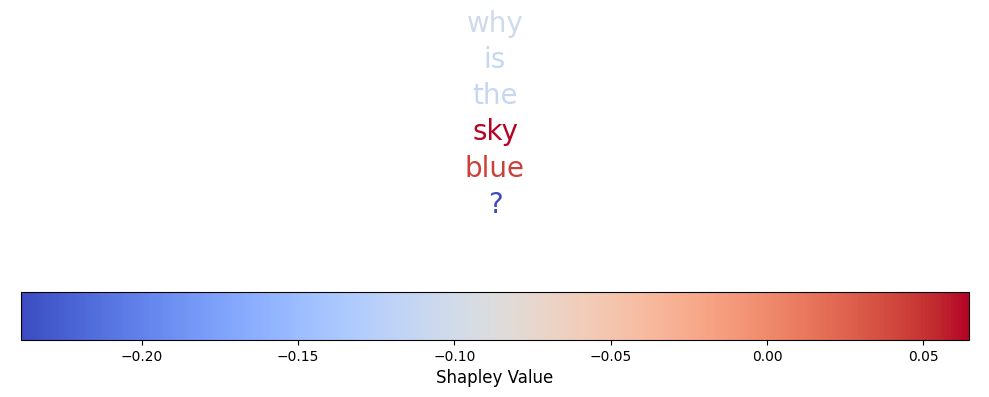

CPU times: user 1.21 s, sys: 391 ms, total: 1.61 s
Wall time: 54.3 s


In [10]:
%%time
# Initialize TokenSHAP with your model & tokenizer
model_name = "llama3"
tokenizer_path ="NousResearch/Hermes-2-Theta-Llama-3-8B"
tshap = TokenSHAP(model_name, tokenizer_path)

# Analyze token importance
prompt = "why is the sky blue?"
results = tshap.analyze(prompt, sampling_ratio = 0.3)

In [13]:
tshap.shapley_values

{'why': -0.10214019803170037,
 'is': -0.11059924796204493,
 'the': -0.11063228225644033,
 'sky': 0.06464314028302587,
 'blue': 0.04423823800505897,
 '?': -0.23871330236565422}

In [14]:
results

,Prompt,Response,Cosine_Similarity
0,why?,I was about to explain why I thought that ques...,0.088519
1,why is?,It seems like your question got cut off! Could...,0.088269
2,why the,It seems like your question got cut off!\n\nPl...,0.049496
3,is the?,I think you might be missing a word or phrase ...,0.079395
4,why is the,It seems like your question got cut off! Pleas...,0.050403
5,is sky,A simple and profound question!\n\nThe answer ...,0.391938
6,why is sky,I think there may be a bit of confusion here!\...,0.188044
7,why is the sky,"The age-old question: ""Why is the sky blue?""\n...",0.741494
8,why is blue,What a great question!\n\nBlue is often consid...,0.347873
9,why the blue?,The color blue is often associated with calmne...,0.314121


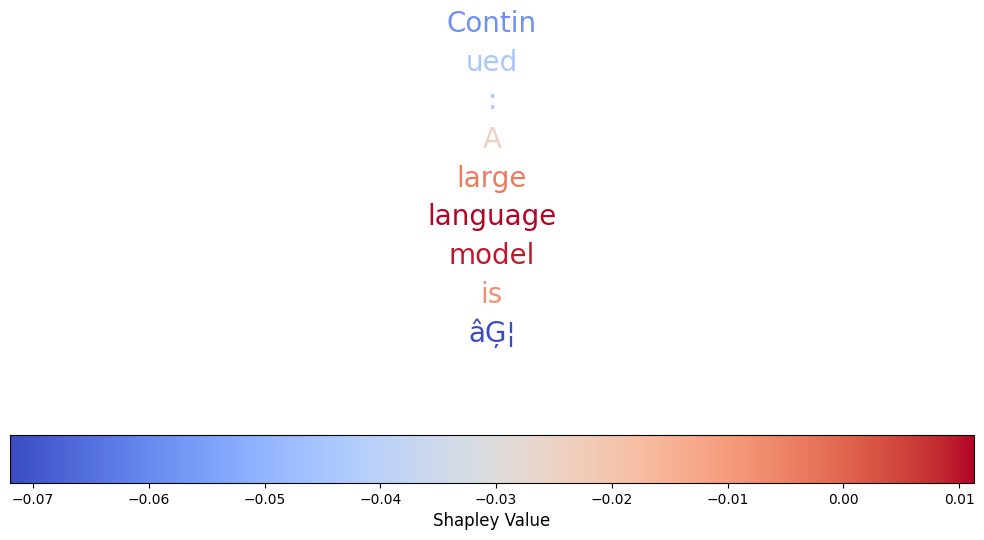

In [15]:
prompt = "Continued: A large language model is…"
results = tshap.analyze(prompt, sampling_ratio = 0.3)

## Multiple Samples

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


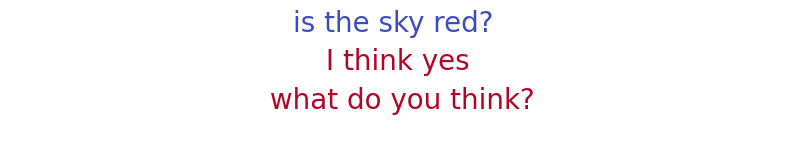

In [2]:
# Initialize TokenSHAP with your model & tokenizer
model_name = "llama3"
tokenizer_path ="NousResearch/Hermes-2-Theta-Llama-3-8B"
tshap = TokenSHAP(model_name, tokenizer_path)

# Analyze token importance
prompt = "is the sky red? \n I think yes \n what do you think?"
results = tshap.analyze(prompt, splitter ='\n')

In [3]:
results

,Prompt,Response,Cosine_Similarity
0,is the sky red?,"No, the sky is not typically red. The color of...",0.609809
1,I think yes,I'm glad we're on the same page! Can you tell ...,0.123578
2,what do you think?,"I apologize, but I didn't receive any specific...",0.159067
3,is the sky red? \n I think yes,"I'm afraid not!\n\nThe sky is actually blue, o...",0.647667
4,is the sky red? \n what do you think?,"I think the sky is not red. In general, the co...",0.703852
5,I think yes \n what do you think?,I see what's happening here! It seems like we'...,0.128047
